## Description

- This notebook will compare daily fitbit data across active groups

In [1]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, MaxNLocator)

In [2]:
daily_df=pd.read_csv('daily_df.csv',header=0)
daily_df.head(5)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,...,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,WeekNumber,ActiveGroup
0,1503960366,2016-04-12,1.0,327.0,346.0,2016-04-12,13162,8.50,8.50,0.0,...,6.06,0.0,25,13,328,728,1985,38,15,Active
1,1503960366,2016-04-13,2.0,384.0,407.0,2016-04-13,10735,6.97,6.97,0.0,...,4.71,0.0,21,19,217,776,1797,40,15,Active
2,1503960366,2016-04-15,1.0,412.0,442.0,2016-04-15,9762,6.28,6.28,0.0,...,2.83,0.0,29,34,209,726,1745,63,15,Active
3,1503960366,2016-04-16,2.0,340.0,367.0,2016-04-16,12669,8.16,8.16,0.0,...,5.04,0.0,36,10,221,773,1863,46,15,Active
4,1503960366,2016-04-17,1.0,700.0,712.0,2016-04-17,9705,6.48,6.48,0.0,...,2.51,0.0,38,20,164,539,1728,58,15,Active


In [3]:
## Create function to generate plots for various attributes

def plot_by_att(df,x,y,group,filt_group=''):
    
    if filt_group != '':
        plot_df=df.loc[df['ActiveGroup']==filt_group]
    else:
        plot_df = df
        
    fig,ax=plt.subplots(figsize=(15, 5))
    sns.lineplot(x=plot_df[x],y=plot_df[y],hue=plot_df[group],palette='Set2')
    ax.xaxis.set_major_locator(MaxNLocator())



### Plot Total Active Minutes by Group

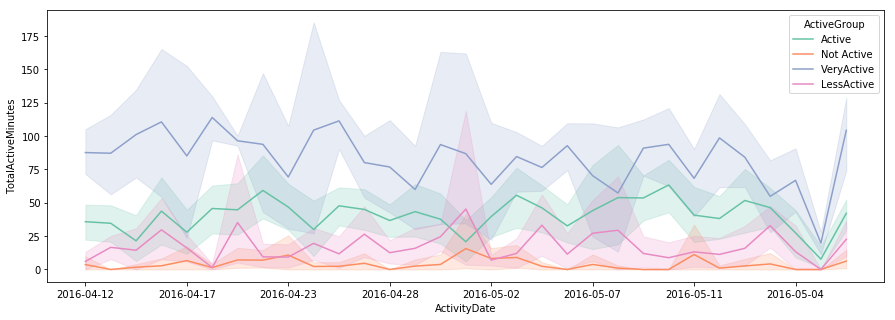

In [4]:
plot_by_att(daily_df,'ActivityDate','TotalActiveMinutes',group='ActiveGroup')


### Plot Daily Calories by Group

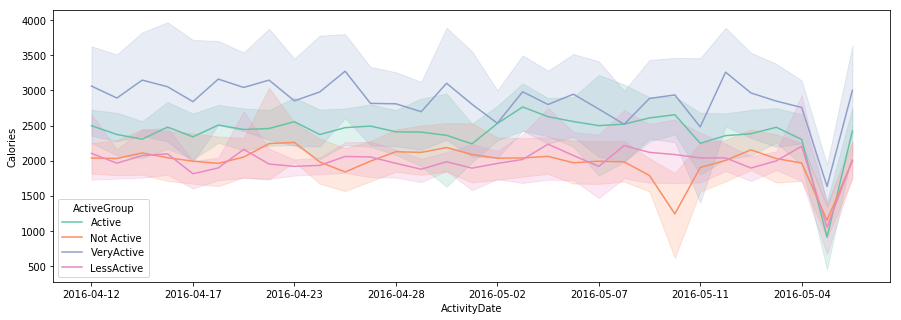

In [5]:
plot_by_att(daily_df,'ActivityDate','Calories',group='ActiveGroup')


### Plot Daily Steps by Group

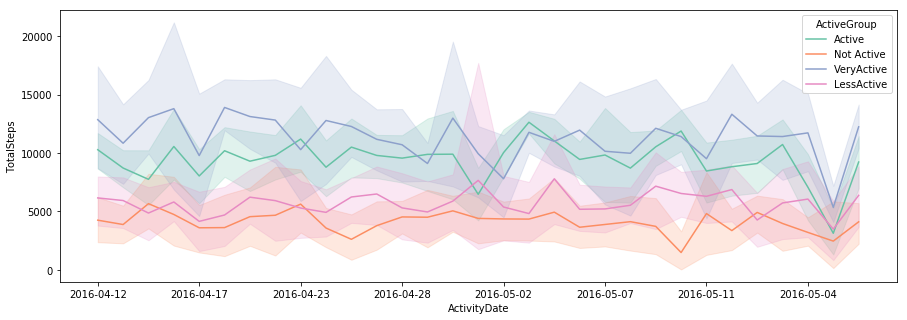

In [6]:
plot_by_att(daily_df,'ActivityDate','TotalSteps',group='ActiveGroup')

## Daily Sleep Analysis

In [7]:
# Drop rows with NA and the sleep dataset contained less users
daily_df2=daily_df.dropna(how='any')

In [8]:
## Calculate Average Time Asleep/Average Time in Bed by Active Group
avg_daily_sleep = daily_df2[['ActiveGroup','TotalMinutesAsleep','TotalTimeInBed']].groupby('ActiveGroup').mean().reset_index()
avg_daily_bedtime = pd.melt(avg_daily_sleep, id_vars=['ActiveGroup'], value_vars=['TotalMinutesAsleep','TotalTimeInBed'],var_name='TimeType',value_name='Average Minutes')


### Compare Time Asleep vs Time in Bed by Active Group

- "Not Active" users on average spend more time asleep and in bed than other users in other active groups
- Interestingly, "Very Active" users on Average spend more time in bed than "Active" and "Less Active" users, but do not spend more significantly more time asleep

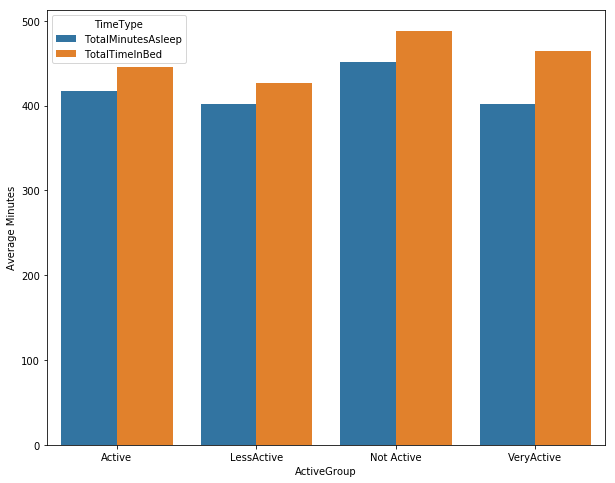

In [9]:
fig,ax=plt.subplots(figsize=(10,8))
ax = sns.barplot(x="ActiveGroup", y="Average Minutes", hue='TimeType', data=avg_daily_bedtime)